# Visualizations

In [33]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
folder = "CB_data"
df = pd.read_csv(folder + "/places_info.csv")

In [35]:
import folium

def plot_clusters_folium(df):
    # map_center = [df["latitude"].mean(), df["longitude"].mean()]
    m = folium.Map(location=[38.028028, -78.508516], zoom_start=14)

    # Define colors for clusters
    cluster_colors = {
        -1: "gray"  # Noise
    }
    unique_clusters = df["cluster_id"].unique()
    cmap = plt.cm.get_cmap("tab10", len(unique_clusters))

    for i, cluster in enumerate(unique_clusters):
        if cluster not in cluster_colors:
            cluster_colors[cluster] = f"#{''.join(np.random.choice(list('0123456789ABCDEF'), 6))}" 
    
    # adding points to a map
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row["latitude"], row["longitude"]],
            radius=5,
            color=cluster_colors[row["cluster_id"]],
            fill=True,
            fill_color=cluster_colors[row["cluster_id"]],
            fill_opacity=0.6,
        ).add_to(m)

    return m

plot_clusters_folium(df)

C:\Users\chery\AppData\Local\Temp\ipykernel_30256\4004076833.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_clusters))


### Bar Charts

C:\Users\chery\AppData\Local\Temp\ipykernel_30256\316331068.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Place Type", data=type_df, palette="coolwarm")


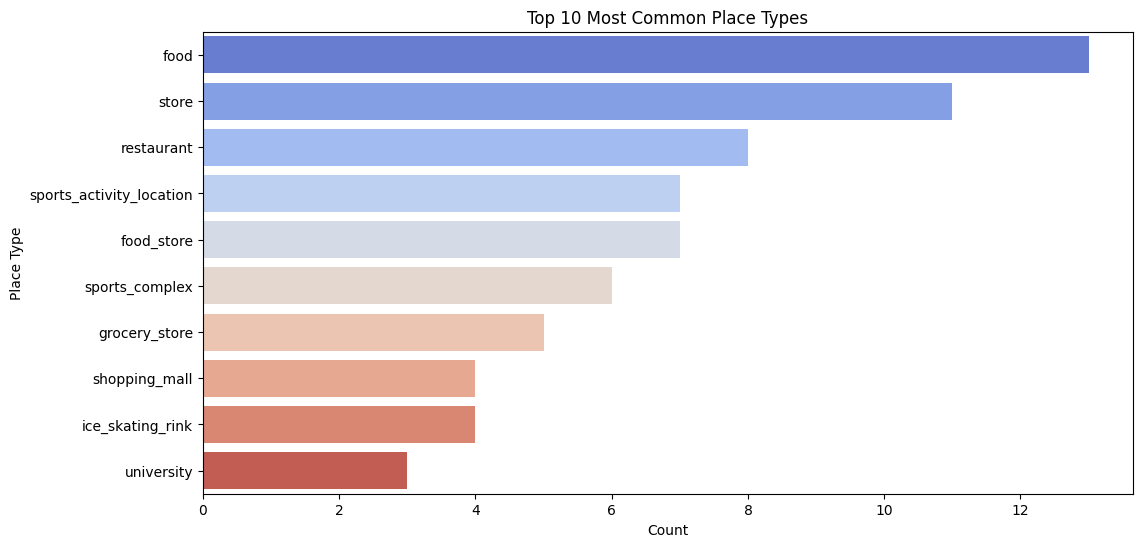

In [36]:
# MOST common types of locations that I have frequented

from collections import Counter
import ast

all_types = []
for types in df['place_types']:
    types_list = ast.literal_eval(types)
    all_types.extend(types_list)

type_counts = Counter(all_types)
top_types = type_counts.most_common(12) # get the top 12

type_df = pd.DataFrame(top_types, columns=["Place Type", "Count"])
type_df = type_df[~type_df["Place Type"].isin(["point_of_interest", "establishment"])]

# Barplot
plt.figure(figsize=(12,6))
sns.barplot(x="Count", y="Place Type", data=type_df, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Place Type")
plt.title("Top 10 Most Common Place Types")
plt.show()

C:\Users\chery\AppData\Local\Temp\ipykernel_30256\1025254907.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=top_clusters.values, palette="Set2")


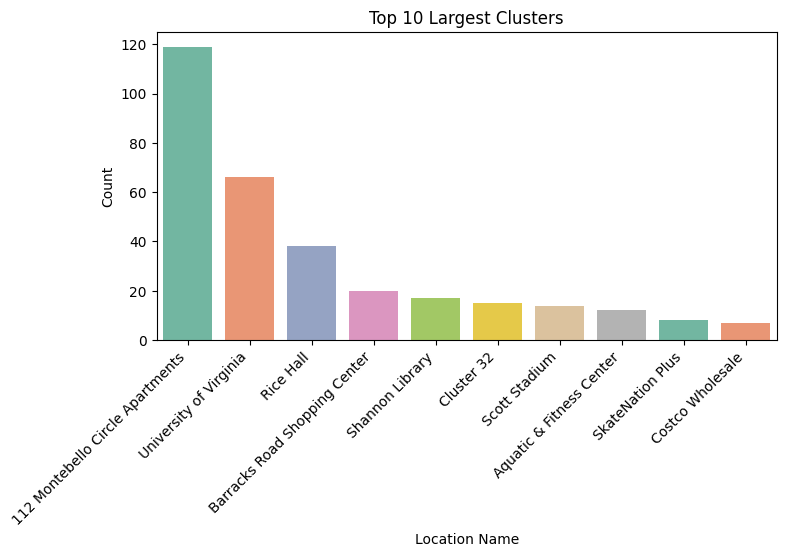

In [37]:
df_cluster_counts = pd.read_csv(folder + "/cluster_counts.csv")
places = pd.read_csv(folder + '/places_info.csv')

df_cluster_counts = df_cluster_counts[df_cluster_counts["cluster"] != -1]
top_clusters = df_cluster_counts['cluster'].value_counts().head(10)

cluster_names = places.set_index("cluster_id")["place_name"].to_dict()
labels = [cluster_names.get(cluster_id, f"Cluster {int(cluster_id)}") for cluster_id in top_clusters.index]

# Bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=labels, y=top_clusters.values, palette="Set2")
plt.xlabel("Location Name")
plt.ylabel("Count")
plt.title("Top 10 Largest Clusters")
plt.xticks(rotation=45, ha="right")
plt.show()

# Based on the bar chart can see most frequented locations in the past month
# Cluster 0 is University of Virginia
# Cluster 32 is my NOVA house


#### Duration at Locations

In [38]:
from collections import Counter
import ast

places_info = pd.read_csv(folder + '/places_info.csv')
places_info['place_types'] = places_info['place_types'].apply(ast.literal_eval)
places_info_exploded = places_info.explode("place_types")
places_info_exploded["total_duration_time"] = pd.to_timedelta(places_info_exploded["total_duration_time"])
places_info_exploded.head()

KeyError: 'total_duration_time'

In [ ]:
from collections import Counter
import ast

places_info = pd.read_csv(folder + '/places_info.csv')
places_info['place_types'] = places_info['place_types'].apply(ast.literal_eval)
places_info_exploded = places_info.explode("place_types")
places_info_exploded["total_duration_time"] = pd.to_timedelta(places_info_exploded["total_duration_time"])
excluded_types = {"point_of_interest", "establishment"}
places_info_exploded = places_info_exploded[~places_info_exploded["place_types"].isin(excluded_types)]
place_type_duration = places_info_exploded.groupby("place_types")["total_duration_time"].sum()
top_10_place_types = place_type_duration.nlargest(10)

plt.figure(figsize=(12, 6))
top_10_place_types.plot(kind="bar", color="royalblue")
plt.xlabel("Place Type")
plt.ylabel("Total Duration (hours)")
plt.title("Top 10 Most Common Place Types by Duration")
plt.xticks(rotation=45)
plt.show()

In [ ]:
cluster_means = pd.read_csv(folder + "/cluster_means.csv")
cluster_means["duration_time"] = pd.to_timedelta(cluster_means["duration_time"])
top_10_clusters = cluster_means.nlargest(10, "duration_time")
places = pd.read_csv(folder + '/places_info.csv')

cluster_names = places.set_index("cluster_id")["place_name"].to_dict()
labels = [cluster_names.get(cluster_id, f"Cluster {int(cluster_id)}") for cluster_id in top_10_clusters["cluster"]]

# Bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=labels, y=top_10_clusters["duration_time"].dt.total_seconds() / 3600, palette="Set2")
plt.xlabel("Location Name")
plt.ylabel("Total Duration (hours)")
plt.title("Top 10 Clusters by Duration Time")
plt.xticks(rotation=45, ha="right")
plt.show()